In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
s=pd.read_csv('master.csv')

In [163]:
s.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [164]:
s.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [137]:
s.shape

(27820, 12)

In [165]:
s.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [166]:
del s['HDI for year']

In [176]:
s.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [151]:
s_max=s.groupby(by='country')['suicides_no'].sum().reset_index().sort_values(by='suicides_no',ascending=False)

In [143]:
s_max.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


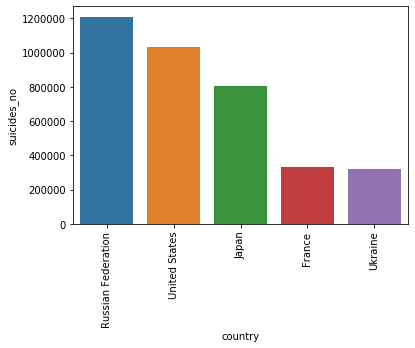

In [144]:
sns.barplot(x='country',y='suicides_no',data=s_max.head())
plt.xticks(rotation=90)
plt.show()

In [152]:
s_min=s.groupby(by='country')['suicides_no'].sum().reset_index().sort_values(by='suicides_no')

In [146]:
s_min.head()

,country,suicides_no
27,Dominica,0
76,Saint Kitts and Nevis,0
79,San Marino,4
1,Antigua and Barbuda,11
55,Maldives,20


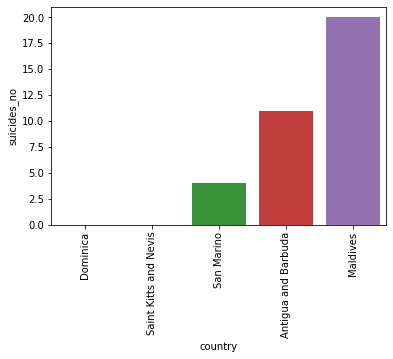

In [147]:

sns.barplot(x='country',y='suicides_no',data=s_min.head())
plt.xticks(rotation=90)
plt.show()

In [153]:
s_danger=s.loc[s.country.isin(s_max.country.head())]
s_danger.country.unique()

array(['France', 'Japan', 'Russian Federation', 'Ukraine',
       'United States'], dtype=object)

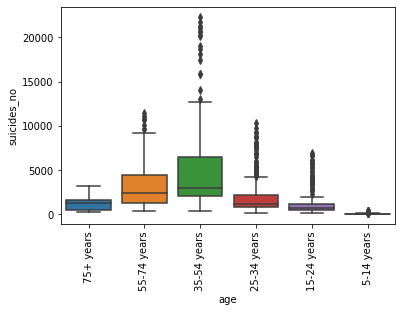

In [149]:
sns.boxplot(x='age',y='suicides_no',data=s_danger)
plt.xticks(rotation=90)
plt.show()
#It shows the suicide distribution for various age groups in 5 danger countries
#where suicides are maximum in age group 35-54 years and 5-14yrs age group having least no of suicides

In [154]:
s_safe=s.loc[s.country.isin(s_min.country.head())]
s_safe.country.unique()

array(['Antigua and Barbuda', 'Dominica', 'Maldives',
       'Saint Kitts and Nevis', 'San Marino'], dtype=object)

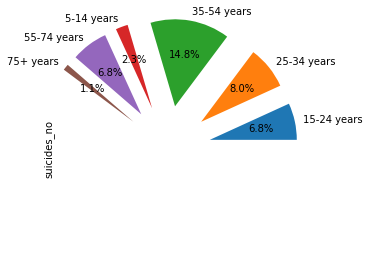

In [186]:
s_safe.groupby('age')['suicides_no'].mean().plot.pie(autopct="%1.1f%%",explode=(0.5,0.5,0.5,0.5,0.5,0.5))
#It shows the suicide mean percentage for various age groups in 5 safe countries
#where suicides percentgae is maximum in age group 35-54 years

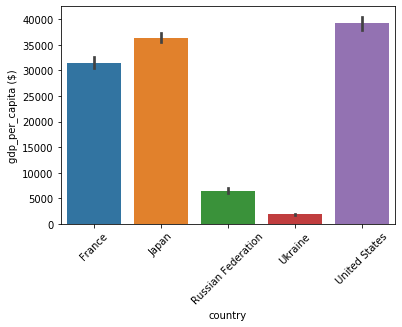

In [179]:
sns.barplot(x='country',y='gdp_per_capita ($)',data=s_danger)
plt.xticks(rotation=45)
plt.show()

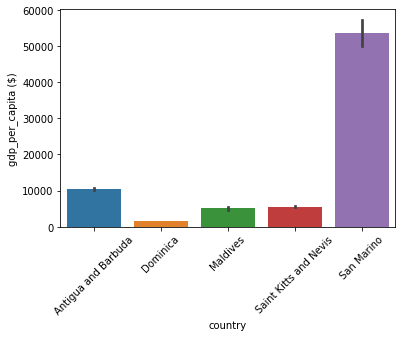

In [180]:
sns.barplot(x='country',y='gdp_per_capita ($)',data=s_safe)
plt.xticks(rotation=45)
plt.show()

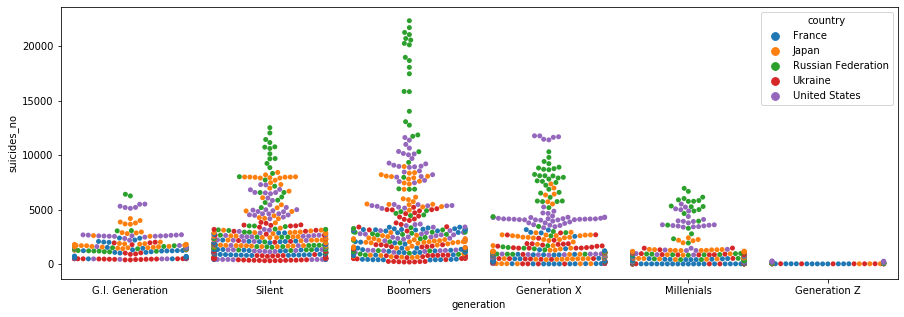

In [192]:
fig=plt.figure(figsize=(15,5))
sns.swarmplot(x='generation',y='suicides_no',data=s_danger,hue='country')
plt.show()

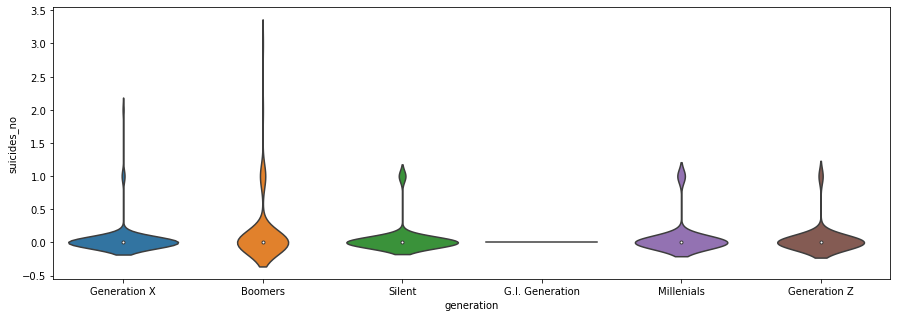

In [197]:
fig=plt.figure(figsize=(15,5))
sns.violinplot(x='generation',y='suicides_no',data=s_safe)
plt.show()

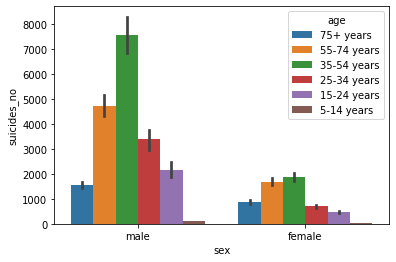

In [198]:
sns.barplot(x='sex',y='suicides_no',hue='age',data=s_danger)
plt.show()

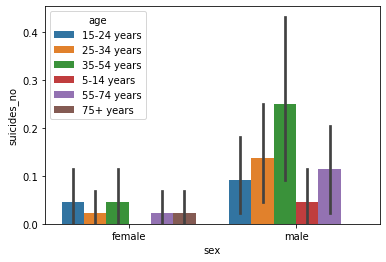

In [204]:
sns.barplot(x='sex',y='suicides_no',hue='age',data=s_safe)
plt.show()